## 使用偏斜数据进行欺诈预测

#### 1、读取数据

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())
df = pd.read_csv("./data/creditcard.csv")
df

D:\workspace\pycharm\RecommendSystem\XGBoost_SMOTE


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,...,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99,0
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,...,0.500,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99,0
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,...,-0.053,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45,0
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,...,0.401,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10,0
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,...,-0.042,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99,0
5,41,1.154,0.265,0.385,0.575,-0.217,-0.392,-0.081,0.063,-0.261,...,-0.193,-0.558,0.169,0.187,0.089,0.094,-0.010,0.020,2.67,0
6,41,1.139,-1.193,1.407,-0.330,-2.070,-0.242,-1.307,0.105,0.135,...,-0.156,-0.031,-0.020,0.434,-0.030,1.141,-0.009,0.042,96.94,0
7,42,-0.523,1.010,0.276,1.475,-0.707,0.355,1.560,-0.400,-0.480,...,0.172,1.012,0.070,0.158,-1.109,-0.302,0.318,0.317,243.66,0
8,49,1.099,0.202,0.525,1.323,-0.130,0.040,0.028,0.073,-0.098,...,-0.025,0.154,-0.063,0.253,0.629,-0.345,0.040,0.010,13.18,0
9,51,1.260,0.254,0.515,0.621,-0.476,-0.992,0.066,-0.209,0.036,...,-0.257,-0.739,0.136,0.382,0.219,0.094,-0.029,0.019,1.98,0


In [3]:
df['index'] = df.index
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,index
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,...,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99,0,0
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,...,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99,0,1
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,...,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45,0,2
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,...,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10,0,3
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,...,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99,0,4
5,41,1.154,0.265,0.385,0.575,-0.217,-0.392,-0.081,0.063,-0.261,...,-0.558,0.169,0.187,0.089,0.094,-0.010,0.020,2.67,0,5
6,41,1.139,-1.193,1.407,-0.330,-2.070,-0.242,-1.307,0.105,0.135,...,-0.031,-0.020,0.434,-0.030,1.141,-0.009,0.042,96.94,0,6
7,42,-0.523,1.010,0.276,1.475,-0.707,0.355,1.560,-0.400,-0.480,...,1.012,0.070,0.158,-1.109,-0.302,0.318,0.317,243.66,0,7
8,49,1.099,0.202,0.525,1.323,-0.130,0.040,0.028,0.073,-0.098,...,0.154,-0.063,0.253,0.629,-0.345,0.040,0.010,13.18,0,8
9,51,1.260,0.254,0.515,0.621,-0.476,-0.992,0.066,-0.209,0.036,...,-0.739,0.136,0.382,0.219,0.094,-0.029,0.019,1.98,0,9


#### 2、数据信息统计

In [3]:
print("Time")
print(df.Time.describe())
print("V1")
print(df.V1.describe())
print("Amount")
print(df.Amount.describe())
print("Class")
print(df.Class.describe())
print(df.Class.nunique())
print("ALL")
print(df.describe())

Time
count     56874.000000
mean      94995.469934
std       47535.817923
min          10.000000
25%       54380.250000
50%       84664.500000
75%      139664.500000
max      172782.000000
Name: Time, dtype: float64
V1
count    56874.000000
mean         0.010646
std          1.933044
min        -41.929000
25%         -0.915000
50%          0.027000
75%          1.320000
max          2.455000
Name: V1, dtype: float64
Amount
count    56874.000000
mean        88.264681
std        233.922284
min          0.000000
25%          5.740000
50%         22.205000
75%         78.600000
max       7862.390000
Name: Amount, dtype: float64
Class
count    56874.000000
mean         0.001793
std          0.042311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64
2
ALL
                Time            V1            V2            V3            V4  \
count   56874.000000  56874.000000  56874.000000  56874.000000  56874.00

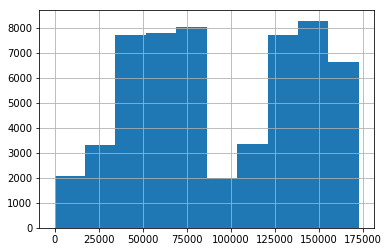

In [4]:
df.Time.hist()

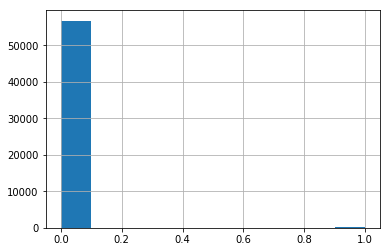

In [5]:
df.Class.hist()

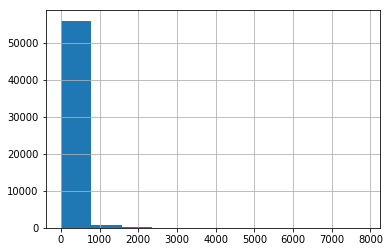

In [7]:
df.Amount.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000145E2F90E80>,
      dtype=object)

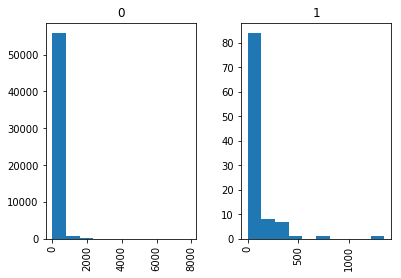

In [6]:
df.Amount.hist(by=df.Class)

In [8]:
print(df.groupby('Class').size())

Class
0    56772
1      102
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145E6D86B70>,
      dtype=object)

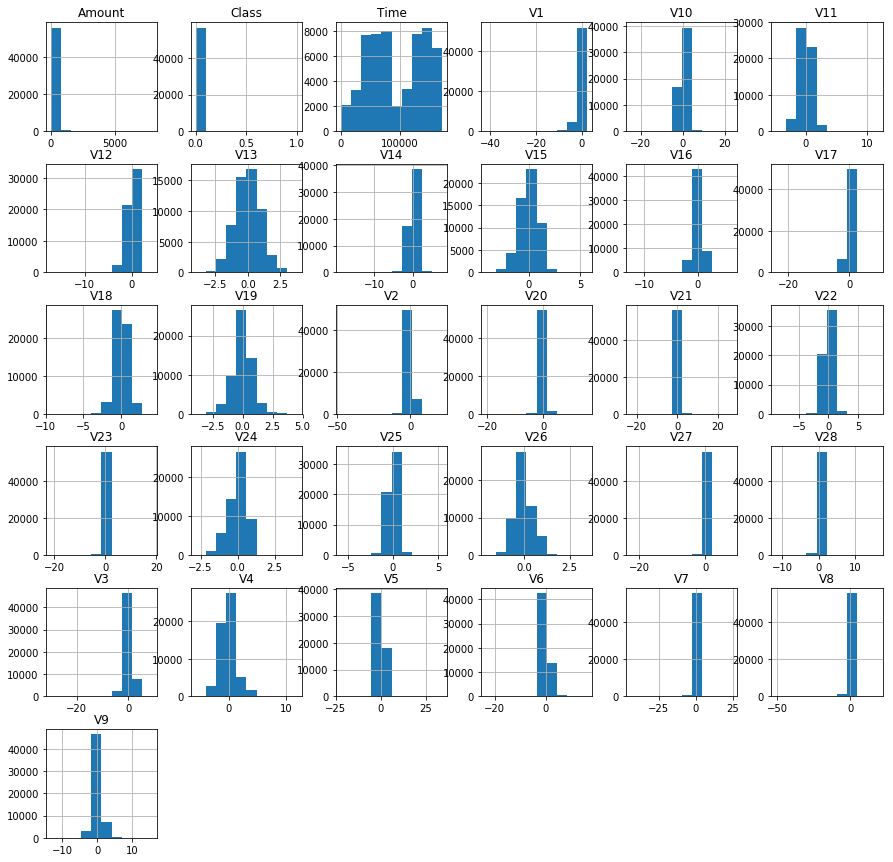

In [9]:
df.hist(figsize=(15,15))

#### 3、检查所选变量的欺诈与非欺诈传播（这样做是为了确定具有良好欺诈行为和非欺诈行为分布的变量选择）

V9 - V10


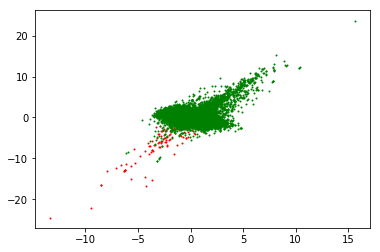

<Figure size 432x288 with 0 Axes>

In [11]:
sample = df[df['Class']==0]
fraud = df[df['Class']==1]
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

index


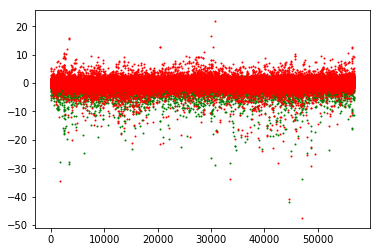

<Figure size 432x288 with 0 Axes>

In [4]:
print('index')
plt.scatter(df['index'], df['V1'], s=1, color = 'g')
plt.scatter(df['index'], df['V2'], s=1, color = 'r')
plt.show()
plt.clf()

V16-V17


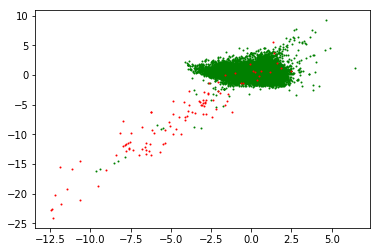

<Figure size 432x288 with 0 Axes>

In [12]:
print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V17 - V18


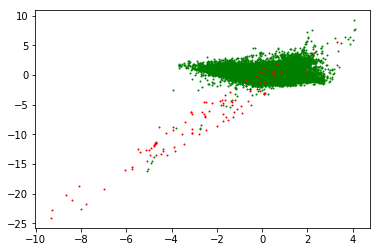

<Figure size 432x288 with 0 Axes>

In [13]:
print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V3


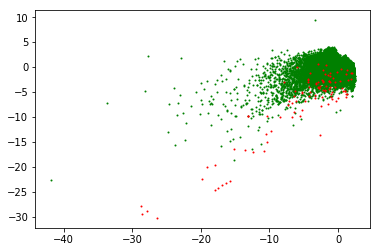

<Figure size 432x288 with 0 Axes>

In [14]:
print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V2


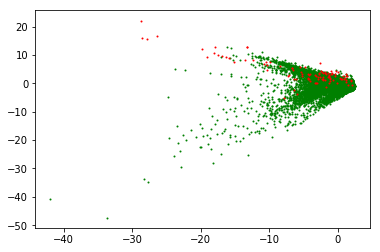

<Figure size 432x288 with 0 Axes>

In [18]:
print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

#### 4、将数据分为训练和测试数据集

In [20]:
from sklearn.model_selection import train_test_split

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print("xtrain shape:")
print(xtrain.shape)
print("xtest shape:")
print(xtest.shape)

xtrain shape:
(39811, 30)
xtest shape:
(17063, 30)


#### 5、使用算法训练模型

使用随机森林算法训练模型

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
# 获取TP、FP、TN、FN
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

C:\Users\xinle\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[17029     1]
 [    8    25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.96      0.76      0.85        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.98      0.88      0.92     17063
weighted avg       1.00      1.00      1.00     17063

Accuracy : 0.999473
Area under the curve : 0.878759


使用梯度提升算法

梯度提升是一种用于回归和分类问题的机器学习技术，它以一组弱预测模型（通常为决策树）的形式生成预测模型。 像其他增强方法一样，它以分阶段的方式构建模型，并通过允许对任意可微分的损失函数（损失函数或成本函数是映射一个事件或一个或多个变量的值的函数）进行优化来对其进行概括 直观地表示与事件相关联的“费用”的实数）。 这是一种基于Boosting的算法，是一种结合了弱学习者以创建可以做出准确预测的强大学习者的集成技术。

In [22]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17025     5]
 [   10    23]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.82      0.70      0.75        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.91      0.85      0.88     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9991209048819082
Area under the curve : 0.848338


使用XGBoost算法

In [23]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())

# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}
[0]	validation_0-error:0.000502	validation_1-error:0.000762
[1]	validation_0-error:0.000527	validation_1-error:0.000762
[2]	validation_0-error:0.000427	validation_1-error:0.000762
[3]	validation_0-error:0.000527	validation_1-error:0.000762
[4]	validation_0-error:0.000502	validation_1-error:0.000645
[5]	validation_0-error:0.000427	validation_1-error:0.00082
[6]	validation_0-error:0.000427	validation_1-error:0.000762
[7]	validation_0-error:0.000402	validation_1-error:0.000762
[8]	validation_0-error:0.000352	validation_1-error:0.000703
[9]	validation_0-error:0.000352	validation_1-error:0.000762
[10]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [24]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17028     2]
 [    7    26]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.93      0.79      0.85        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.96      0.89      0.93     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9994725429291449
Area under the curve : 0.893881


从上述模型中可以看出f1值最优的模型是XGBoost模型，所以选择XGBoost模型进行训练

#### 6、降低特征（这样做是为了检查是否可以通过较少的变量来提高准确性）

In [25]:
# Split The Data with few variables

from sklearn.model_selection import train_test_split

x = df[['V9', 'V10','V16', 'V17', 'V18', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(39811, 6)
xtest shape
(17063, 6)


使用随机森林算法对缩小数据维度的数据进行训练

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[17027     3]
 [    6    27]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.90      0.82      0.86        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.95      0.91      0.93     17063
weighted avg       1.00      1.00      1.00     17063

Accuracy : 0.999473
Area under the curve : 0.909003


使用梯度提升算法对缩小数据维度的数据进行训练

In [27]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17025     5]
 [    8    25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.83      0.76      0.79        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.92      0.88      0.90     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9992381175643205
Area under the curve : 0.878641


使用XGBoost算法对缩小数据维度的数据进行训练

In [28]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()
# List the default parameters.
print(xgb_model.get_xgb_params())
# Train ande valuate
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}
[0]	validation_0-error:0.000527	validation_1-error:0.000645
[1]	validation_0-error:0.000553	validation_1-error:0.000586
[2]	validation_0-error:0.000553	validation_1-error:0.000586
[3]	validation_0-error:0.000553	validation_1-error:0.000586
[4]	validation_0-error:0.000553	validation_1-error:0.000586
[5]	validation_0-error:0.000553	validation_1-error:0.000586
[6]	validation_0-error:0.000553	validation_1-error:0.000586
[7]	validation_0-error:0.000553	validation_1-error:0.000586
[8]	validation_0-error:0.000553	validation_1-error:0.000586
[9]	validation_0-error:0.000553	validation_1-error:0.000586
[10]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [29]:

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17027     3]
 [    7    26]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.90      0.79      0.84        33

   micro avg       1.00      1.00      1.00     17063
   macro avg       0.95      0.89      0.92     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9994139365879389
Area under the curve : 0.893851


#### 7、随机欠采样（我们将10％的非欺诈行为与欺诈数据合并）

In [30]:
'''We are taking 10% of non frauds and merge it with frauds data'''

df = df[['Class', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]


sample = df[df['Class']==0]
fraud = df[df['Class'] == 1]

# random sampling
ignore_me, sample = train_test_split(sample, test_size = 0.1)

In [33]:
import warnings
warnings.filterwarnings("ignore")

sample = pd.concat([sample, fraud])

# Split into train and test units.
xtrain, xtest = train_test_split(sample, test_size = 0.3)
ytrain = xtrain['Class']
ytest = xtest['Class']
xtrain.drop('Class', 1, inplace = True)
xtest.drop('Class', 1, inplace = True)

随机森林算法

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[1705    0]
 [   5   24]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1705
           1       1.00      0.83      0.91        29

   micro avg       1.00      1.00      1.00      1734
   macro avg       1.00      0.91      0.95      1734
weighted avg       1.00      1.00      1.00      1734

Accuracy : 0.997116
Area under the curve : 0.913793


梯度提升算法

In [35]:
from sklearn import ensemble

params = {'n_estimators': 650, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1703    2]
 [   4   25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1705
           1       0.93      0.86      0.89        29

   micro avg       1.00      1.00      1.00      1734
   macro avg       0.96      0.93      0.95      1734
weighted avg       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.9965397923875432
Area under the curve : 0.930448


XGBoost算法

In [37]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())


# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}
[0]	validation_0-error:0.001977	validation_1-error:0.004614
[1]	validation_0-error:0.001977	validation_1-error:0.004614
[2]	validation_0-error:0.001977	validation_1-error:0.004614
[3]	validation_0-error:0.001977	validation_1-error:0.004614
[4]	validation_0-error:0.001977	validation_1-error:0.004614
[5]	validation_0-error:0.001977	validation_1-error:0.004614
[6]	validation_0-error:0.001977	validation_1-error:0.004614
[7]	validation_0-error:0.001977	validation_1-error:0.004614
[8]	validation_0-error:0.001977	validation_1-error:0.004614
[9]	validation_0-error:0.001977	validation_1-error:0.004614
[10]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1704    1]
 [   4   25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1705
           1       0.96      0.86      0.91        29

   micro avg       1.00      1.00      1.00      1734
   macro avg       0.98      0.93      0.95      1734
weighted avg       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.9971164936562861
Area under the curve : 0.930741


#### 8、过采样：SMOTE ( Synthetic Minority Over-sampling Technique)

In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

'''Increase the fraud samples from 102 to 500'''

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(x, y)

sample_res = X_res
sample_res['Class'] = y_res
sample_res_0 = sample_res[sample_res['Class'] == 0]
sample_res_1 = sample_res[sample_res['Class'] == 1]
ignore_me_1, sample_res_1 = train_test_split(sample_res_1, test_size = 0.1)
sample_res_1 = pd.concat([sample_res_1, df[df['Class']==1]])
sample_res = pd.concat([sample_res_0, sample_res_1])
y_res = sample_res['Class']
X_res = sample_res.drop(['Class'], axis=1)

print('Orige dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Orige dataset shape Counter({0: 56772, 1: 102})
Resampled dataset shape Counter({0: 56772, 1: 5780})


In [25]:
# 划分数据集
xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(43786, 30)
xtest shape
(18766, 30)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[16957     2]
 [   13  1794]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16959
           1       1.00      0.99      1.00      1807

    accuracy                           1.00     18766
   macro avg       1.00      1.00      1.00     18766
weighted avg       1.00      1.00      1.00     18766

Accuracy : 0.999201
Area under the curve : 0.99634

In [27]:
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[16953     6]
 [   68  1739]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16959
           1       1.00      0.96      0.98      1807

    accuracy                           1.00     18766
   macro avg       1.00      0.98      0.99     18766
weighted avg       1.00      1.00      1.00     18766

-----------------------------------------------------------------------------------------
Accuracy is :
0.9960566982841309
Area under the curve : 0.981007


In [28]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())


# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}
[0]	validation_0-error:0.006029	validation_1-error:0.005968
[1]	validation_0-error:0.006052	validation_1-error:0.006128
[2]	validation_0-error:0.006029	validation_1-error:0.005968
[3]	validation_0-error:0.006052	validation_1-error:0.006128
[4]	validation_0-error:0.006029	validation_1-error:0.005968
[5]	validation_0-error:0.005732	validation_1-error:0.005808
[6]	validation_0-error:0.005687	validation_1-error:0.005702
[7]	validation_0-error:0.005687	validation_1-error:0.005808
[8]	validation_0-error:0.005687	validation_1-error:0.005702
[9]	validation_0-error:0.005664	validation_1-error:0.005702
[10]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[16954     5]
 [   27  1780]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16959
           1       1.00      0.99      0.99      1807

    accuracy                           1.00     18766
   macro avg       1.00      0.99      1.00     18766
weighted avg       1.00      1.00      1.00     18766

-----------------------------------------------------------------------------------------
Accuracy is :
0.9982947884471918
Area under the curve : 0.992382


In [33]:
sample_res[sample_res['Class']==1]['Amount']

80914      44.434567
104335     78.576840
112034    135.670414
69673      82.452601
110707      0.346018
102288     38.996339
94414      29.273627
72303     229.388080
88030      78.092430
103883    421.941073
113370     11.247589
72953     118.560825
98649       2.154604
66432     119.546690
72576      73.618393
77193      69.352428
59051      88.230000
70100     157.777589
57588      42.791727
76493       0.251110
93295     110.026427
60762     155.101391
104144     59.202916
103579      1.000000
68682      98.144228
87082      70.889186
103271      1.000000
94832     863.348470
84666     201.148226
91195      29.967608
             ...    
32621      65.000000
33338     105.890000
34379     144.620000
36660      25.000000
38029       4.870000
38294     276.170000
40055     130.210000
40498       0.000000
43465     195.660000
43991     320.010000
44001       2.000000
44251       0.000000
44476       1.000000
45082       0.000000
46671       0.000000
46683       1.590000
47255       1